## Direction Fields
In this Jupyter Notebook, we will solve scalar non-autonomous differential equations of the form $dx/dt=f(t,x)$ graphically using direction fields. The next cell loads several Python modules needed for running the code. To proceed, click twice on the run button (the triangle in the top menubar) to run the current and the next cell.

In [1]:
%matplotlib widget
from math import *
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

We now define the main function `apply_direction_field`, which will compute and plot the direction field, take input from your mouse button to set an initial condition, calculate the solution going forward and backward in time through your initial condition, and graph the solution. 

In [2]:
def apply_direction_fields(rhs, xmin, xmax, tmin, tmax):

    def plotdf(rhs, xrange, yrange, grid, ax):
        x = np.linspace(xrange[0], xrange[1], grid[0])
        y = np.linspace(yrange[0], yrange[1], grid[1])
        X, Y = np.meshgrid(x, y)
        DX = X*0 + 1.0
        DY = rhs(X, Y)
        M = (np.hypot(DX, DY))
        M[M==0] = 1.0
        DX = DX/M
        DY = DY/M  
        ax.quiver(X, Y, DX, DY, color='tab:green', angles='xy', alpha=0.8)

    def cross_bottom(t, x): return x[0]-(xmin-0.1)
    cross_bottom.terminal = True

    def cross_top(t, x): return x[0]-(xmax+0.1)
    cross_top.terminal = True

    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    ax.set_title("Direction field")
    ax.set_xlabel('time t')
    ax.set_ylabel('x')
    ax.set_xlim(tmin, tmax)
    ax.set_ylim(xmin, xmax)
    ax.grid(True)
    plotdf(rhs, [tmin, tmax], [xmin, xmax], [11, 11], ax)
    plt.show()

    def solve_ode(t, x):
        tf = np.linspace(t, tmax, 100)
        tb = np.linspace(t, tmin, 100) 
        solf = solve_ivp(rhs, [t, tmax], [x], t_eval=tf, events=[cross_bottom, cross_top], atol=1.e-8, rtol=1.e-6)
        solb = solve_ivp(rhs, [t, tmin], [x], t_eval=tb, events=[cross_bottom, cross_top], atol=1.e-8, rtol=1.e-6)
        ax.scatter(t, x, color='tab:olive')
        ax.plot(solf.t, solf.y[0], color='tab:blue')
        ax.plot(solb.t, solb.y[0], color='tab:blue')
        plt.show()

    def on_click(event):
        if event.button is MouseButton.LEFT:
            x, y = event.x, event.y
            if event.inaxes == ax:
                t = event.xdata
                x = event.ydata
                if x>xmin and x<xmax: solve_ode(t, x)

    plt.connect('button_press_event', on_click)


The following cell defines the right-hand side $f(t,x)=x-x^2+0.5\sin(t)$ of our differential equation. Click again twice on the run button to execute this and the next cell. The code will create a direction field with arrows indicating the slope of the tangents of solution curves. If you position your mouse anywhere in the figure and click, the code will compute and plot the solution that starts at the $(t,x)$ location of your mouse. Try it out a few times to see what happens!

<IPython.core.display.Javascript object>


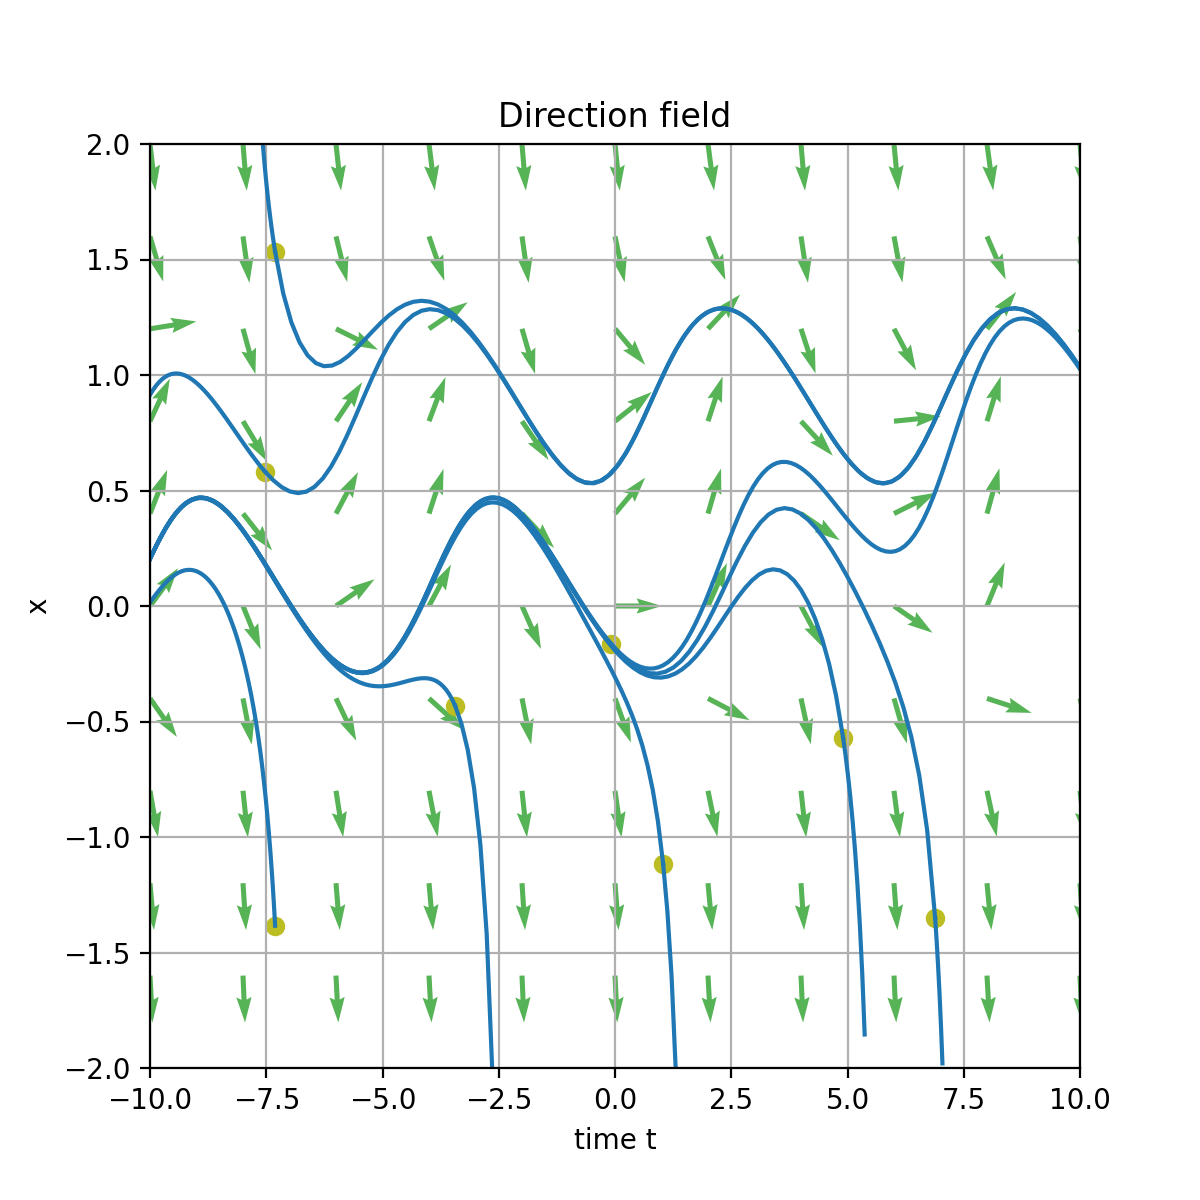

In [3]:
def f(t, x):
    return x - x**2 + 0.5*np.sin(t)

apply_direction_fields(f, xmin=-2, xmax=2, tmin=-10, tmax=10)

You can go back to the previous cell (click on the gray area containing the `def f(t,x):` statement) and edit the expression for f(t,x) or the values `xmin`, `xmax`, `tmin`, and `tmax` which are the minimum and maximum values used for the x and t variables that our solver will use. You can edit the expression for f that we use:
- Make sure that you use `**` for exponents (so `x**3` means x<sup>3</sup>). If you want to use trigonometric functions, use `np.sin(x)` or `np.cos(x)` for the sine or cosine functions.
- The code is written in Python. Python uses indentation to separate elements of the code, and you can see that the `return x-x**2+0.5*np.sin(t)` statement in the definition of f(t,x) is indented: you need to leave this statement indented or the code will result in an error.

If your code no longer works, try to undo the last edits (see the "Edit" menu om the ipper left corner) in the cells in which you made changes or, if this fails, upload the original Jupyter notebook again.